# The Basics of Linear Regression
This notebook covers the fundamentals of linear regression in machine learning. In this project we look at the following:
- Data Preparation
- Split Dataset for Machine Learning
- Train the model
- compute the mean square error
- Compute the $R^2$ 


We will go ahead by importing the neccessary python libraries. Because this covers the fundamentals, we will not be using sicit-learn, rather we will code directly using the normal equation 

## About the data set
We are going to be using a car data set. it has the following features

- `Make`: Manufacturer/brand of the vehicle.

- `Model`: Specific vehicle model name.

- `Year`: Year the vehicle was manufactured.

- `Engine Fuel Type`: Type of fuel used by the vehicle’s engine.

- `Engine HP`: Horsepower of the engine (measure of power).

- `Engine Cylinders`: Number of cylinders in the engine.

- `Transmission Type`: Type of transmission system.

- `Driven_Wheels`: Which wheels receive engine power (drive configuration).

- `Number of Doors`: Total number of doors on the vehicle.

- `Market Category`: Marketing classification of the car (often multiple categories).

- `Vehicle Size`: Size classification of the vehicle.

- `Vehicle Style`: Style or body type of the vehicle.

- `Highway MPG`: Fuel efficiency in miles per gallon on highways.

- `City MPG`: Fuel efficiency in miles per gallon in city driving.

- `Popularity`: Popularity score (measured by dataset provider, usually sales-based).

- `MSRP`: Manufacturer’s Suggested Retail Price (vehicle price at release, USD).


In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [46]:
df=pd.read_csv("data/car_sales.csv")
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


Data assessments

In [47]:
print("The data shape",df.shape)
df.info()

The data shape (11914, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  


In [48]:
# Check for fileds that contain missing values
df_na=df.isnull().sum()
df_na[df_na>0]


Engine Fuel Type       3
Engine HP             69
Engine Cylinders      30
Number of Doors        6
Market Category     3742
dtype: int64

In [49]:
df.dtypes[df.dtypes=='object']

Make                 object
Model                object
Engine Fuel Type     object
Transmission Type    object
Driven_Wheels        object
Market Category      object
Vehicle Size         object
Vehicle Style        object
dtype: object

# Data Wrangling
**Observations**
- inconsistent colum names
- Some fields contains missing values

**Action**
- convert fields snake_case
- fill missing values with 0. (0 in this case means the field is not present as we attempt to train our model) 
- Split dataframe into training (60%),test (20%) and validation set (20%)
- create a function that prepare the data

**Optional Objective**
We'll be creating a function that prepares our dataframe, this way the originality of the dataframe is preservedPlan


In [50]:
# rename columns
df.columns=df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [51]:
# Nomalize the  strings in the dataframe
string_cols=list(df.dtypes[df.dtypes=='object'].index)
for col in string_cols:
  df[col]=df[col].str.lower().str.replace(' ', '_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Explorative Data Analysis
In this section we will do a basic data explorative analysis. We will examine the distribution of the the car prices on a histogram

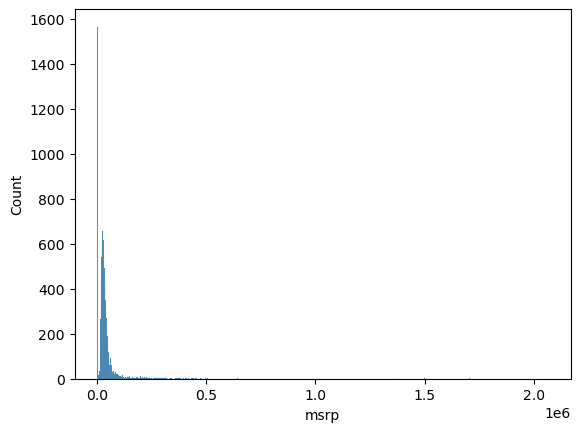

In [52]:
# Assess the distribution of the dependent variable, msrp 
sns.histplot(df.msrp);

> It seems the majority of the data is concentrated betwen $0.0e^6$ and $0.5e^6$
> We'll limit the data to about $1.0e^6$ for clearer view of the distribution. However, it can be observed that the data is right skewed

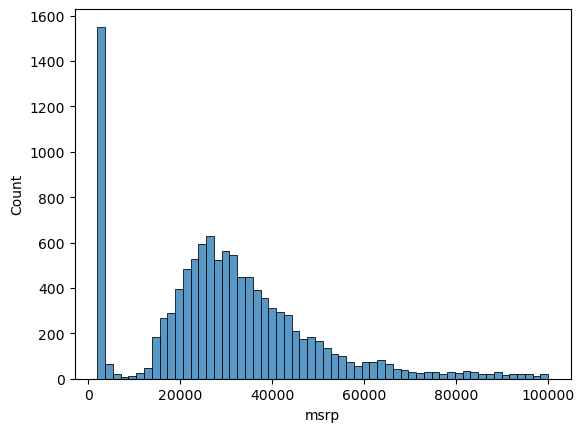

In [53]:
sns.histplot(df.msrp[df.msrp<100000]);

>**Observation**
>
>There is the need to scale down the price using logarithm function

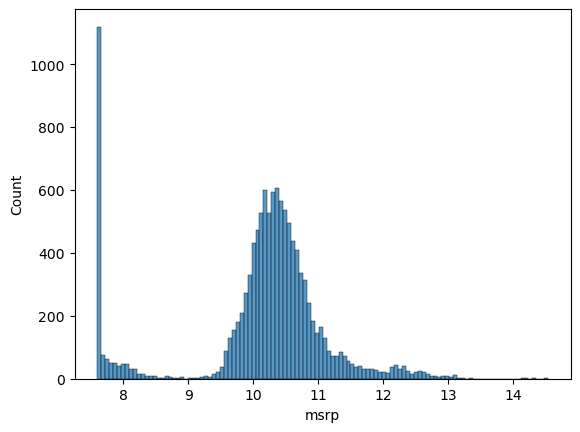

In [54]:
# scale the price
sns.histplot(np.log1p(df.msrp));

# Train, Test and Validation data set set up

In [55]:
# calculate the percentage of rows in each split
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
#sp
idx=np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
# shuffle and split dataframe
df_train=df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [56]:
#check if all row counts of splits are equal to totaal
assert n==len(df_train)+len(df_val)+len(df_test)

# reset index
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [57]:
# prepare y variables
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#### Choose and prepare features of the data
 We'll wrap the remaining data preparation actions in a function

In [58]:
def prepare_X(df):
    df=df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
    df['age']=2017-df.year
    features=base+['age']
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)
    return df[features].fillna(0).values

# **Linear Regression**
regression function

$g(x_i)=W_0 +W_1x_1+W_2x_2+W_3x_3...W_nx_n$

$g(x_i)=W_0+\sum_{j=1}^nW_jx_j$

Matrix version

$ W=(X^TX)^{-1}X^Ty$

$ g(x)=W_0+x_i.W$

Mean squared error

$RMSE=1/m\sum_{j=1}^ng(x_i)-y_i$

In [72]:
# nomal equation of linear regression
def linear_reg(X,y):
    X=np.column_stack([np.ones(X.shape[0]),X])
    XTX=X.T@X
    w_full=np.linalg.inv(XTX)@X.T@y
    return w_full[0],w_full[1:]

# root-squared mean error
def rmse(y,y_pred):
    return np.sqrt(((y-y_pred)**2).mean())


In [73]:
X_train=prepare_X(df_train)
X_val=prepare_X(df_val)

w0,w=linear_reg(X_train,y_train)
y_val_pred=w0+X_val@w

print ("validation rsme:", rmse(y_val,y_val_pred))

validation rsme: 0.515799564150169


<Axes: ylabel='Count'>

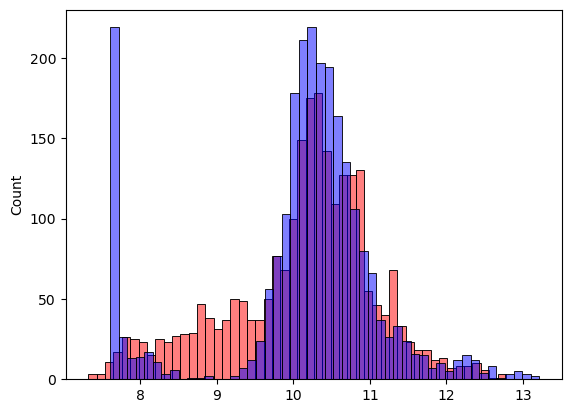

In [61]:
sns.histplot(y_val_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)

# Regularization

In [65]:
def linear_regg(X,y,r=0.001):
    X=np.column_stack([np.ones(X.shape[0]),X])
    XTX=X.T@X 
    XTX=XTX +r*np.eye(XTX.shape[0])
    XTX_in=np.linalg.inv(XTX)
    w_full=XTX_in@X.T@y
    return w_full[0],w_full[1:]

# solve for the parameters
w0,w=linear_regg(X_train,y_train,r=0.01)

In [66]:
y_val2_pred=w0+X_val@w
rmse(y_val,y_val2_pred)

0.5158061645845848

In [67]:
# find optimum r
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    w0,w=linear_regg(X_train,y_train,r)
    y_pred=w0+X_val@w
    score=rmse(y_val,y_pred)
    print(r,w0,score)

0.0 10.659085118454128 0.515799564150169
1e-05 10.659056886829932 0.5157995707256944
0.0001 10.658802820463801 0.5157996299071498
0.001 10.65626394292027 0.515800221947161
0.1 10.395476266089734 0.5158674745473458
1 9.001523583176505 0.5165272172025678
10 6.881162539373185 0.5244272457204655


## Use Model


In [68]:
df_m_train=pd.concat([df_train,df_val]).reset_index(drop=True)
X_m_train=prepare_X(df_m_train)
X_test=prepare_X(df_test)
y_m_train=np.log1p(df_m_train.msrp)

In [69]:
w0,w=linear_regg(X_m_train,y_m_train)

y_test_pred=w0+X_test@w
score=rmse(y_test,y_test_pred)
print(score)

0.5135836841151029


In [70]:
print(df_test.iloc[20].to_dict())
car=pd.DataFrame([df_test.iloc[20].to_dict()])

{'make': 'toyota', 'model': 'sienna', 'year': 2015, 'engine_fuel_type': 'regular_unleaded', 'engine_hp': 266.0, 'engine_cylinders': 6.0, 'transmission_type': 'automatic', 'driven_wheels': 'front_wheel_drive', 'number_of_doors': 4.0, 'market_category': nan, 'vehicle_size': 'large', 'vehicle_style': 'passenger_minivan', 'highway_mpg': 25, 'city_mpg': 18, 'popularity': 2031, 'msrp': 35000}


In [71]:
X_c=prepare_X(car)
y_pred=w0+X_c@w
pred_price=np.expm1x(y_pred)[0]
actual_price=car.msrp[0] 
print(f"Actual price: {actual_price} predicted price {pred_price}")

Actual price: 35000 predicted price 40445.406838391


#### Foot Note
The effect of regularization will be obivious as more features are been added
The function below adds the top 5 popular values of the other category variables of the data set

In [74]:
def prepare_X(df):
    df=df.copy()
    base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']
    df['age']=2017-df.year
    features=base+['age']
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)
    for name, values in categorical.items():
        for v in values:
            df['%s_%s' % (name, v)]=(df[name]==v).astype(int)
            features.append('%s_%s' % (name, v))
    return df[features].fillna(0).values